# Feature Engineering-All Techniques To Handle Missing Values- Day 2 . Worked on it on 10 Feb 2021¶

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("house.csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [4]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

# frequent catorogry imputation

In [6]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

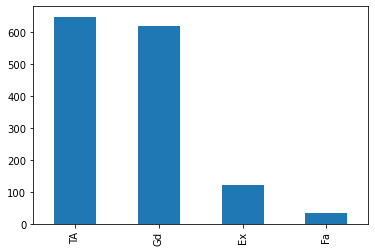

In [13]:
df["BsmtQual"].value_counts().plot.bar()

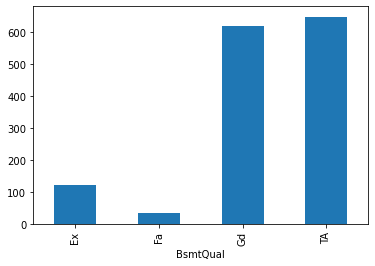

In [12]:
df.groupby(["BsmtQual"])["BsmtQual"].count().plot.bar()

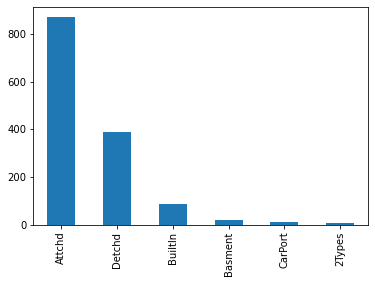

In [14]:
df["GarageType"].value_counts().plot.bar()

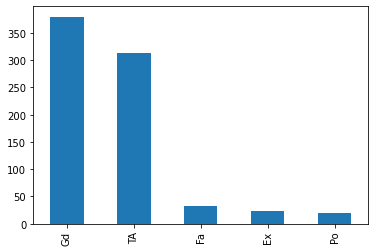

In [15]:
df["FireplaceQu"].value_counts().plot.bar()

In [19]:
def impute_nan(df,variable):
    most_frequent=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent, inplace=True)

In [20]:
impute_nan(df,"BsmtQual")

In [21]:
df["BsmtQual"].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [23]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,feature)

In [24]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

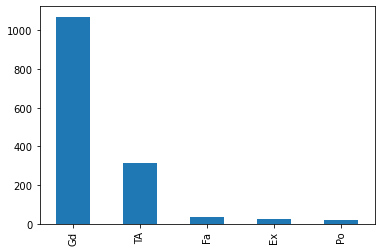

In [25]:
df["FireplaceQu"].value_counts().plot.bar()  # this is problem if we rep;ace 47% missing values

## Adding a new variable

In [30]:
df=pd.read_csv("house.csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [31]:
import numpy as np

In [32]:
df["BsmtQual_1"]=np.where(df["BsmtQual"].isnull(),1,0)

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_1
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [34]:
freq=df["BsmtQual"].value_counts().index[0]

In [35]:
df["BsmtQual"].fillna(freq, inplace=True)

In [36]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType      81
SalePrice        0
BsmtQual_1       0
dtype: int64

In [42]:
 df=pd.read_csv("house.csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [44]:
def impute_nan(df,variable):
    df[variable+"new"]=np.where(df[variable].isnull(),"missing", df[variable])

In [45]:
for f in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,f)

In [46]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [48]:
df["BsmtQualnew"].value_counts()

TA         649
Gd         618
Ex         121
missing     37
Fa          35
Name: BsmtQualnew, dtype: int64

In [49]:
df=df.drop(["BsmtQual","FireplaceQu","GarageType"], axis=1)

In [50]:
df.head()

,SalePrice,BsmtQualnew,FireplaceQunew,GarageTypenew
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# ordinal encodeing

In [59]:
 df=pd.read_csv("titanic.csv", usecols=["Survived","Cabin"])

In [60]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [61]:
df["Cabin"].fillna("Missing", inplace=True)

In [63]:
df["Cabin"]=df["Cabin"].astype(str).str[0]

In [64]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [66]:
df.groupby(["Cabin"])["Survived"].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [75]:
df.groupby(["Cabin"])["Survived"].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [67]:
ordinal_labels=df.groupby(["Cabin"])["Survived"].mean().sort_values().index

In [68]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [69]:
dict={k:i for i,k in enumerate(ordinal_labels,0)}

In [70]:
dict

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [71]:
df["Cabin_1"]=df["Cabin"].map(dict)

In [72]:
df.head()

,Survived,Cabin,Cabin_1
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
